In [2]:
### Download libraries
#%pip install uproot 
#%pip install awkward 
#%pip install mplhep 
#%pip install numpy 
#%pip install matplotlib 
#%pip install scipy
### Upgrade libraries to latest version
#%pip install uproot awkward mplhep numpy matplotlib scipy --upgrade

In [3]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit

In [4]:
path_data = 'opal_data/mc/'
file = uproot.open(path_data+'mm.root')
ttree_name = 'myTTree'
file[ttree_name].keys()
branches = file[ttree_name].arrays()
## here, we can determine arbitrary the values of ee that we need..
var1 = 'Ncharged'
var2 = 'Pcharged'
var3 = 'E_ecal'
var4 = 'E_hcal'
var5 = 'cos_thet'
var6 = 'cos_thru'
var7 = 'E_lep'
## converting the ak arrays into np arrays
nchar = ak.to_numpy(branches[var1])
pchar = ak.to_numpy(branches[var2])
Ecal  = ak.to_numpy(branches[var3])
Hcal  = ak.to_numpy(branches[var4])
cos_theta = ak.to_numpy(branches[var5])
cos_thrust = ak.to_numpy(branches[var6])
Elep =ak.to_numpy(branches[var7])
print(len(nchar))

94381


# Plotting the MonteCarlo data to check if it's as expected

0.0 73101.055
0.20199999 87.71737
0.0 98.78001
-0.9871748 999.0
-0.99984854 999.0


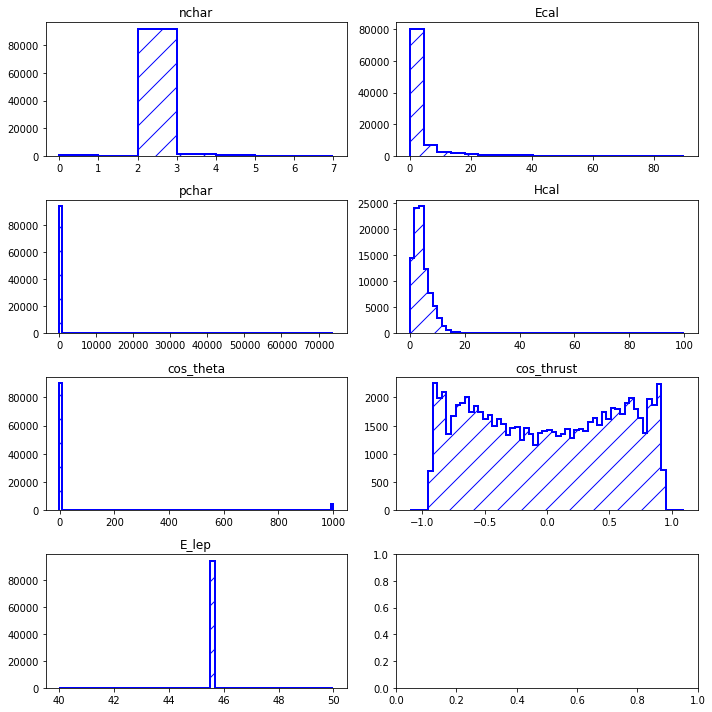

In [5]:
##comparing all Ecal(SumE)
#print(min(nchar),max(nchar))
print(min(pchar),max(pchar))
print(min(Ecal),max(Ecal))
print(min(Hcal),max(Hcal))
print(min(cos_theta),max(cos_theta))
print(min(cos_thrust),max(cos_thrust))
fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs[0, 0].hist(nchar,bins=7, range=(0,7), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 0].set_title("nchar")
axs[1, 0].hist(pchar,bins=100,range=(0,74000), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[1, 0].set_title("pchar")
axs[0, 1].hist(Ecal,bins=20,range=(0,90), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 1].set_title("Ecal")
axs[1, 1].hist(Hcal,bins=60,range=(0,100), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[1, 1].set_title("Hcal")
axs[2,0].hist(cos_theta,bins=100,range=(-1.1,1001), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[2,0].set_title("cos_theta")
axs[2,1].hist(cos_thrust,bins=60,range=(-1.1,1.1), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[2,1].set_title("cos_thrust")
axs[3,0].hist(Elep,bins=60,range=(40,50), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[3,0].set_title("E_lep")
fig.tight_layout()

# Applying the cuts

In [6]:
muon_cut = (branches['Ncharged'] <= 3) & (branches['E_ecal'] <= 10) 
muon_cut = ak.to_numpy(muon_cut)
#print(type(cut_CtrkN))

In [7]:
eff = sum(muon_cut)/len(muon_cut)
print(eff)

0.9258961019696761


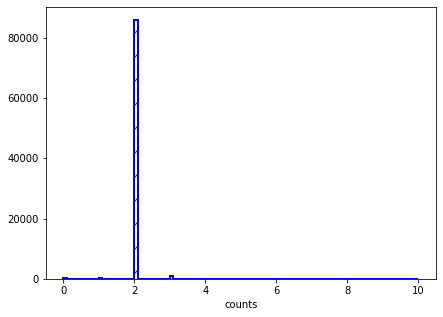

In [8]:
plt.figure(figsize=(7,5))
bin_content, bin_edges, _= plt.hist(nchar[muon_cut],bins=100,range=(0,10), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
plt.xlabel('counts')
#plt.xlim(0,100)
plt.show()

# Backward Forward Asymmetry

In [0]:
mw33_1 = (branches['Ncharged'] <= 3) & (branches['E_ecal'] <= 10) & (branches['E_lep']>=44) & (branches['E_lep']<=44.5) 
mw33_2 = (branches['Ncharged'] <= 3) & (branches['E_ecal'] <= 10) & (branches['E_lep']>=44.5) & (branches['E_lep']<=45) 
mw33_3 = (branches['Ncharged'] <= 3) & (branches['E_ecal'] <= 10) & (branches['E_lep']>=45) & (branches['E_lep']<=45.5) 


## backward scattering
back_1 = mw33_1 & (branches['cos_thet'] <= 0)  
back_2 = mw33_2 & (branches['cos_thet'] <= 0)  
back_3 = mw33_3 & (branches['cos_thet'] <= 0)  
back_4 = mw33_4 & (branches['cos_thet'] <= 0)  
back_5 = mw33_5 & (branches['cos_thet'] <= 0)  
back_6 = mw33_6 & (branches['cos_thet'] <= 0)  
back_7 = mw33_7 & (branches['cos_thet'] <= 0)  
##
corrback_1 = muon_inv_eff*sum(back_1)
corrback_2 = muon_inv_eff*sum(back_2)
corrback_3 = muon_inv_eff*sum(back_3)
corrback_4 = muon_inv_eff*sum(back_4)
corrback_5 = muon_inv_eff*sum(back_5)
corrback_6 = muon_inv_eff*sum(back_6)
corrback_7 = muon_inv_eff*sum(back_7)
##
sigma_mm_b_1 = corrback_1/Lum[0]
sigma_mm_b_2 = corrback_2/Lum[1]
sigma_mm_b_3 = corrback_3/Lum[2]
sigma_mm_b_4 = corrback_4/Lum[3]
sigma_mm_b_5 = corrback_5/Lum[4]
sigma_mm_b_6 = corrback_6/Lum[5]
sigma_mm_b_7 = corrback_7/Lum[6]
##
sigma_mm_corr_b_1 = sigma_mm_b_1 + cor_lep[0]
sigma_mm_corr_b_2 = sigma_mm_b_2 + cor_lep[1]
sigma_mm_corr_b_3 = sigma_mm_b_3 + cor_lep[2]
sigma_mm_corr_b_4 = sigma_mm_b_4 + cor_lep[3]
sigma_mm_corr_b_5 = sigma_mm_b_5 + cor_lep[4]
sigma_mm_corr_b_6 = sigma_mm_b_6 + cor_lep[5]
sigma_mm_corr_b_7 = sigma_mm_b_7 + cor_lep[6]

sigma_mm_back = np.asarray([sigma_mm_corr_b_1,sigma_mm_corr_b_2,sigma_mm_corr_b_3,sigma_mm_corr_b_4,sigma_mm_corr_b_5,sigma_mm_corr_b_6,sigma_mm_corr_b_7])

## forward scattering
forw_1 = mw33_1 & (branches['cos_thet'] >= 0)  
forw_2 = mw33_2 & (branches['cos_thet'] >= 0)  
forw_3 = mw33_3 & (branches['cos_thet'] >= 0)  
forw_4 = mw33_4 & (branches['cos_thet'] >= 0)  
forw_5 = mw33_5 & (branches['cos_thet'] >= 0)  
forw_6 = mw33_6 & (branches['cos_thet'] >= 0)  
forw_7 = mw33_7 & (branches['cos_thet'] >= 0)  
##
corrforw_1 = muon_inv_eff*sum(forw_1)
corrforw_2 = muon_inv_eff*sum(forw_2)
corrforw_3 = muon_inv_eff*sum(forw_3)
corrforw_4 = muon_inv_eff*sum(forw_4)
corrforw_5 = muon_inv_eff*sum(forw_5)
corrforw_6 = muon_inv_eff*sum(forw_6)
corrforw_7 = muon_inv_eff*sum(forw_7)
#
sigma_mm_f_1 = corrforw_1/Lum[0]
sigma_mm_f_2 = corrforw_2/Lum[1]
sigma_mm_f_3 = corrforw_3/Lum[2]
sigma_mm_f_4 = corrforw_4/Lum[3]
sigma_mm_f_5 = corrforw_5/Lum[4]
sigma_mm_f_6 = corrforw_6/Lum[5]
sigma_mm_f_7 = corrforw_7/Lum[6]
#

sigma_mm_corr_f_1 = sigma_mm_f_1 + cor_lep[0]
sigma_mm_corr_f_2 = sigma_mm_f_2 + cor_lep[1]
sigma_mm_corr_f_3 = sigma_mm_f_3 + cor_lep[2]
sigma_mm_corr_f_4 = sigma_mm_f_4 + cor_lep[3]
sigma_mm_corr_f_5 = sigma_mm_f_5 + cor_lep[4]
sigma_mm_corr_f_6 = sigma_mm_f_6 + cor_lep[5]
sigma_mm_corr_f_7 = sigma_mm_f_7 + cor_lep[6]

sigma_mm_forw = np.asarray([sigma_mm_corr_f_1,sigma_mm_corr_f_2,sigma_mm_corr_f_3,sigma_mm_corr_f_4,sigma_mm_corr_f_5,sigma_mm_corr_f_6,sigma_mm_corr_f_7])

